Obtaining city id: 北京success
Get bus data: 1号线
地铁1号线八通线(环球度假区-古城) success
地铁1号线八通线(古城-环球度假区) success
地铁1号线支线(八角游乐园-青龙湖东) success
地铁1号线支线(青龙湖东-八角游乐园) success
Get bus data: 2号线
地铁2号线外环(西直门-西直门) success
地铁2号线内环(积水潭-积水潭) success
地铁6号线二期(潞城-东小营南) success
地铁6号线二期(东小营南-潞城) success


<Axes: >

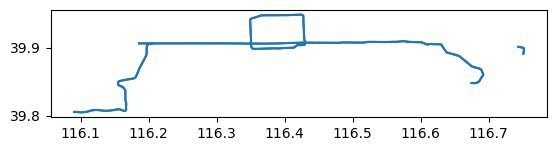

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import geopandas as gpd
import transbigdata as tbd
line, stop = tbd.getbusdata('北京', ['1号线', '2号线'])

line.plot()

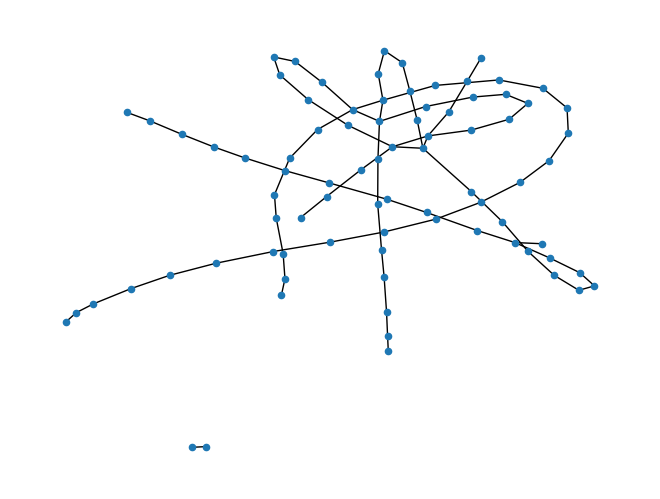

In [2]:
#Modeling for subway network topology
line['speed'] = 55 #operation speed 55km/h
line['stoptime'] = 0.5 #stop time at each stations 30s
import networkx as nx
G = tbd.metro_network(line,stop, transfertime=5)
nx.draw(G,node_size=20)

[[0.         1.49722587 0.        ]
 [1.49722587 0.         0.        ]
 [0.         0.         0.        ]]


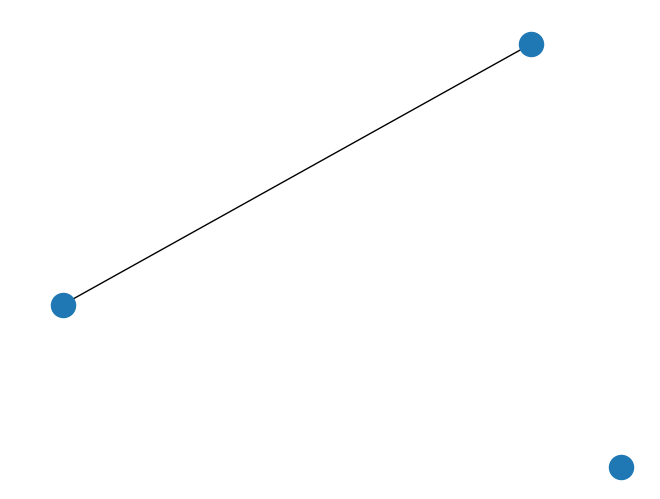

In [3]:
# 假设G是你的地铁网络图
# G = ...

# 已知的站点列表
known_stations = ['地铁1号线八通线东单', '地铁1号线八通线西单', '地铁1号线八通线王府井']

# 创建子图
subgraph = G.subgraph(known_stations)
nx.draw(subgraph)

# 生成邻接矩阵
adj_matrix = nx.adjacency_matrix(subgraph)

# 转换为NumPy数组
adj_array = adj_matrix.toarray()

# 打印邻接矩阵
print(adj_array)

In [4]:
station = pd.read_csv('./CTS-2024-dataset/station_20230521.csv')
station

FileNotFoundError: [Errno 2] No such file or directory: './CTS-2024-dataset/station_20240519.csv'

In [6]:
G.nodes

NodeView(('地铁1号线八通线环球度假区', '地铁1号线八通线花庄', '地铁1号线八通线土桥', '地铁1号线八通线临河里', '地铁1号线八通线梨园', '地铁1号线八通线九棵树', '地铁1号线八通线果园', '地铁1号线八通线通州北苑', '地铁1号线八通线八里桥', '地铁1号线八通线管庄', '地铁1号线八通线双桥', '地铁1号线八通线传媒大学', '地铁1号线八通线高碑店', '地铁1号线八通线四惠东', '地铁1号线八通线四惠', '地铁1号线八通线大望路', '地铁1号线八通线国贸', '地铁1号线八通线永安里', '地铁1号线八通线建国门', '地铁1号线八通线东单', '地铁1号线八通线王府井', '地铁1号线八通线天安门东', '地铁1号线八通线天安门西', '地铁1号线八通线西单', '地铁1号线八通线复兴门', '地铁1号线八通线南礼士路', '地铁1号线八通线木樨地', '地铁1号线八通线军事博物馆', '地铁1号线八通线公主坟', '地铁1号线八通线万寿路', '地铁1号线八通线五棵松', '地铁1号线八通线玉泉路', '地铁1号线八通线八宝山', '地铁1号线八通线八角游乐园', '地铁1号线八通线古城', '地铁1号线支线八角游乐园', '地铁1号线支线体育场南街', '地铁1号线支线园博园西门', '地铁1号线支线张郭庄', '地铁1号线支线西二区', '地铁1号线支线后吕村', '地铁1号线支线云岗', '地铁1号线支线王佐', '地铁1号线支线民族大学', '地铁1号线支线青龙湖东', '地铁2号线外环西直门', '地铁2号线外环车公庄', '地铁2号线外环阜成门', '地铁2号线外环复兴门', '地铁2号线外环长椿街', '地铁2号线外环宣武门', '地铁2号线外环和平门', '地铁2号线外环前门', '地铁2号线外环崇文门', '地铁2号线外环北京站', '地铁2号线外环建国门', '地铁2号线外环朝阳门', '地铁2号线外环东四十条', '地铁2号线外环东直门', '地铁2号线外环雍和宫', '地铁2号线外环安定门', '地铁2号线外环鼓楼大街', '地铁2号线内环积水潭', '地铁2号线内环鼓楼大街', '地铁2号线内环安定门', '地铁2号线内环雍和宫', '地铁2号线内环东直门', '地铁2号线内环东